## Análisis de regresión lineal simple

### 1. Importado de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### 2. Creación del dataset

In [2]:
df = pd.DataFrame ({'horas': [1, 2, 4, 5, 5, 6, 6, 7, 8, 10, 11, 11, 12, 12, 14],
                   'puntuación': [64, 66, 76, 73, 74, 81, 83, 82, 80, 88, 84, 82, 91, 93, 89]})

In [3]:
df.shape

(15, 2)

In [5]:
df.head(3)

,horas,puntuación
0,1,64
1,2,66
2,4,76


### 3. Visualización preliminar de datos

Se puede observar que la relacón que existe entre las dos variables parece ser lineal con una pendiente positiva.

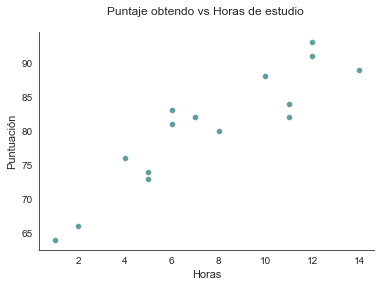

In [9]:
sns.set_style("white")
p = sns.scatterplot(data = df, x = "horas", y = "puntuación",color = "cadetblue")
p.set_title("Puntaje obtendo vs Horas de estudio \n", fontsize = 12)
p.set_xlabel("Horas", fontsize = 11)
p.set_ylabel("Puntuación", fontsize = 11)
sns.despine()

También se puede observar que no existen valores atípicos en la variable dependiente

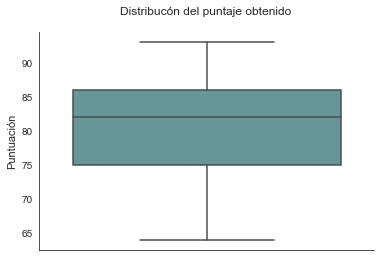

In [10]:
sns.set_style("white")
p = sns.boxplot(y = df["puntuación"], color = "cadetblue")
p.set_title("Distribucón del puntaje obtenido \n", fontsize = 12)
p.set_ylabel("Puntuación", fontsize = 11)
sns.despine()

### 4. Ajuste del modelo de regresión lineal

In [11]:
# Definición de la variable de respuesta o dependiente
y = df["puntuación"]
# Definición de la variable explicativa o independiente
x = df["horas"]
# Adición de una constante a la variables independiente
x = sm.add_constant(x)
# Modelo de regresión lineal
# OLS: ordinary least squares (Método de mínimos cuadrados ordinarios)
modelo = sm.OLS(y, x).fit()

### 5. Presentación de los resultados del modelo

Presentación tabular de todos los resultados

In [13]:
(modelo.summary())

C:\Users\Carlos\anaconda3\envs\DS-Env\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             puntuación   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     63.91
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.25e-06
Time:                        18:49:16   Log-Likelihood:                -39.594
No. Observations:                  15   AIC:                             83.19
Df Residuals:                      13   BIC:                             84.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.3340      2.106     31.023      0.000      60.784      69.884
horas          1.9824      0.248      7.995      0.000       1.447       2.518
==============================================================================
Omnibus:                        4.351   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                1.329
Skew:                           0.092   Prob(JB):                        0.515
Kurtosis:                       1.554   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Presentación como informe de todos los resultados

Según los resultados, la ecuación de regresión ajustada es: **Puntuación = 65,334 + 1,9824 * (horas)**

In [14]:
print(modelo.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.818   
Dependent Variable: puntuación       AIC:                83.1888 
Date:               2022-02-22 18:50 BIC:                84.6049 
No. Observations:   15               Log-Likelihood:     -39.594 
Df Model:           1                F-statistic:        63.91   
Df Residuals:       13               Prob (F-statistic): 2.25e-06
R-squared:          0.831            Scale:              13.256  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     65.3340     2.1060   31.0229   0.0000   60.7842   69.8837
horas      1.9824     0.2480    7.9946   0.0000    1.4467    2.5181
-----------------------------------------------------------------
Omnibus:              4.351        Durbin-Watson:           1.677
Prob(Omnibus):   

Constantes o parámtetros del modelo

In [15]:
modelo.params

const    65.333952
horas     1.982375
dtype: float64

Número de observaciones

In [16]:
modelo.nobs

15.0

R Cuadrado

In [17]:
modelo.rsquared

0.8309797723433321

### 6. Creación de gráficos de residuos

In [ ]:
# Tamaño de la figura
fig = plt.figure(figsize = (12,8))

# Gráficos residuales
fig = smf.graphics.plot_regress_exog(modelo, "horas", fig = fig)

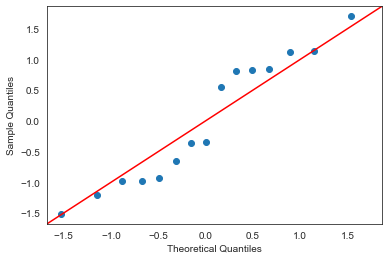

In [19]:
#definir residuales
res = modelo.resid

#create QQ plot
fig = sm.qqplot(res, fit = True , line = "45")
plt.show ()